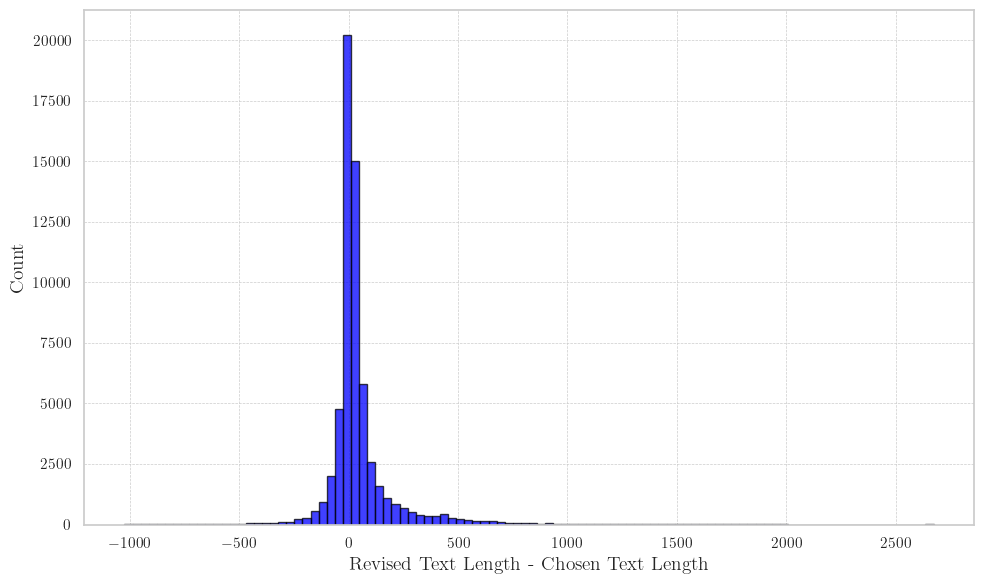

In [28]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import os  
  
def read_lengths_from_csv(filename='lengths_difference.csv'):  
    df = pd.read_csv(filename)  
    return df['response_lengths'].tolist(), df['revised_text_lengths'].tolist()  
  
def calculate_statistics(response_lengths, revised_text_lengths):  
    differences = np.array(revised_text_lengths) - np.array(response_lengths)  
      
    # 计算各分位数  
    percentiles = np.percentile(differences, [0, 25, 50, 75, 100])  
      
    # 最大最小值  
    max_difference = np.max(differences)  
    min_difference = np.min(differences)  
    mena_difference = np.mean(differences)
    # 统计信息  
    statistics = {  
        'min': min_difference,  
        '25th_percentile': percentiles[1],  
        'median': percentiles[2],  
        '75th_percentile': percentiles[3],  
        'max': max_difference ,
        "mean": mena_difference 
    }  
      
    return differences, statistics  
  
def save_statistics(statistics, output_path='plot/statistics_difference.txt'):  
    os.makedirs(os.path.dirname(output_path), exist_ok=True)  
    with open(output_path, 'w') as f:  
        for key, value in statistics.items():  
            f.write(f"{key}: {value}\n")  
  
def plot_difference_distribution(differences, output_path='plot/difference_distribution.pdf'):  
    os.makedirs(os.path.dirname(output_path), exist_ok=True)  
      
    # 设置 LaTeX 字体  
    plt.rc('font', family='serif')  
    plt.rc('text', usetex=True)  
      
    plt.figure(figsize=(10, 6))  
    plt.hist(differences, bins=100, alpha=0.75, color='blue', edgecolor='black')  
      
    # plt.title('Distribution of Length Differences', fontsize=16)  
    plt.xlabel('Revised Text Length - Chosen Text Length', fontsize=14)  
    plt.ylabel('Count', fontsize=14)  
    plt.grid(True, linestyle='--', linewidth=0.5)  
      
    plt.tight_layout()  
    plt.savefig(output_path, dpi=300)  
    plt.show()  
  
# 主函数  
def main():  
    response_lengths, revised_text_lengths = read_lengths_from_csv()  
    differences, statistics = calculate_statistics(response_lengths, revised_text_lengths)  
    save_statistics(statistics)  
    plot_difference_distribution(differences)  
  
main()  


所有数据的各分位数：
0.25     97.0
0.50    252.0
0.75    444.0
dtype: float64
所有数据的最大值: 1408
所有数据的最小值: 1
所有数据的平均值: 293.79151286630946



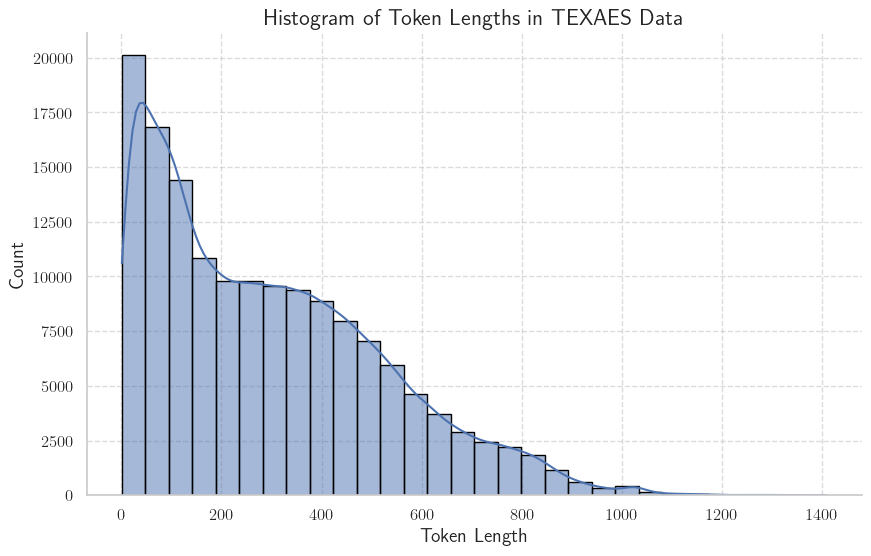

In [26]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
  
# 读取 CSV 文件  
csv_filename = 'lengths.csv'  
df = pd.read_csv(csv_filename)  
  
# 将所有列的数据合并成一个 Series  
all_data = pd.concat([df[column] for column in df.columns])  
  
# 计算所有数据的分位数、最大值、最小值和平均值  
quantiles = all_data.quantile([0.25, 0.5, 0.75])  
max_value = all_data.max()  
min_value = all_data.min()  
mean_value = all_data.mean()  
  
# 打印统计数据  
print("所有数据的各分位数：")  
print(quantiles)  
print(f"所有数据的最大值: {max_value}")  
print(f"所有数据的最小值: {min_value}")  
print(f"所有数据的平均值: {mean_value}")  
print()  # 空行分隔  
  
# 将统计数据写入文件  
output_filename = 'statistics_ta.txt'  
with open(output_filename, 'w') as f:  
    f.write("所有数据的各分位数：\n")  
    f.write(quantiles.to_string() + '\n')  
    f.write(f"所有数据的最大值: {max_value}\n")  
    f.write(f"所有数据的最小值: {min_value}\n")  
    f.write(f"所有数据的平均值: {mean_value}\n")  
  
# 设置图表的风格  
sns.set(style="whitegrid")  
  
# 创建图表  
plt.figure(figsize=(10, 6))  
  
# 绘制所有数据的 token 长度分布图  
sns.histplot(all_data, bins=30, kde=True, color='b', edgecolor='black')  
  
# 添加标题和标签  
plt.title('Histogram of Token Lengths in TEXAES Data', fontsize=16, weight='bold')  
plt.xlabel('Token Length', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
  
# 设置刻度字体大小  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
# 添加网格  
plt.grid(True, linestyle='--', alpha=0.7)  
  
# 去除顶部和右侧的边框  
sns.despine()  
  
# 确保 plot 目录存在  
if not os.path.exists('plot'):  
    os.makedirs('plot')  
  
# 保存图表到 plot 目录  
plt.savefig('plot/combined_token_length_distribution_ta.pdf')  
  
# 显示图表  
plt.show()  


所有数据的各分位数：
0.25     77.0
0.50    255.0
0.75    464.0
dtype: float64
所有数据的最大值: 2700
所有数据的最小值: 1
所有数据的平均值: 297.7969330170933



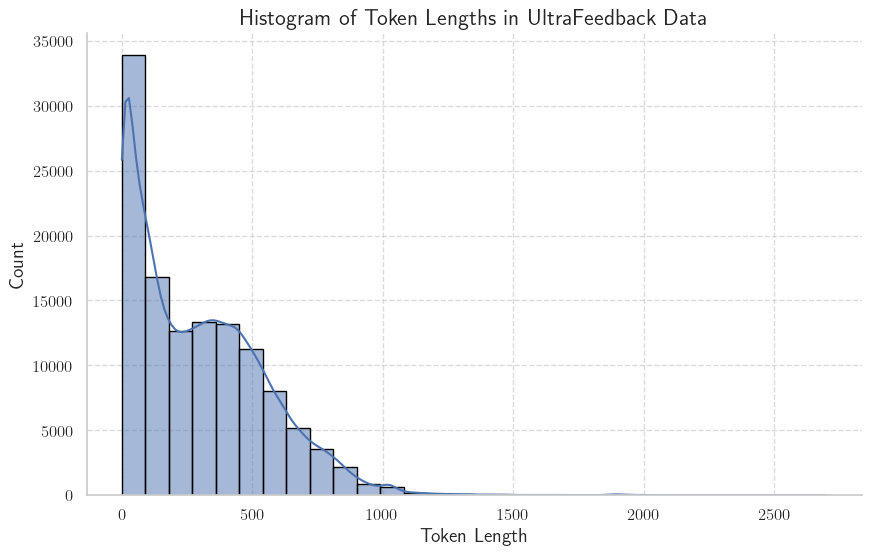

In [27]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
  
# 读取 CSV 文件  
csv_filename = 'lengths_uf.csv'  
df = pd.read_csv(csv_filename)  
  
# 将所有列的数据合并成一个 Series  
all_data = pd.concat([df[column] for column in df.columns])  
  
# 计算所有数据的分位数、最大值、最小值和平均值  
quantiles = all_data.quantile([0.25, 0.5, 0.75])  
max_value = all_data.max()  
min_value = all_data.min()  
mean_value = all_data.mean()  
  
# 打印统计数据  
print("所有数据的各分位数：")  
print(quantiles)  
print(f"所有数据的最大值: {max_value}")  
print(f"所有数据的最小值: {min_value}")  
print(f"所有数据的平均值: {mean_value}")  
print()  # 空行分隔  
  
# 将统计数据写入文件  
output_filename = 'statistics_uf.txt'  
with open(output_filename, 'w') as f:  
    f.write("所有数据的各分位数：\n")  
    f.write(quantiles.to_string() + '\n')  
    f.write(f"所有数据的最大值: {max_value}\n")  
    f.write(f"所有数据的最小值: {min_value}\n")  
    f.write(f"所有数据的平均值: {mean_value}\n")  
  
# 设置图表的风格  
sns.set(style="whitegrid")  
  
# 创建图表  
plt.figure(figsize=(10, 6))  
  
# 绘制所有数据的 token 长度分布图  
sns.histplot(all_data, bins=30, kde=True, color='b', edgecolor='black')  
  
# 添加标题和标签  
plt.title('Histogram of Token Lengths in UltraFeedback Data', fontsize=16, weight='bold')  
plt.xlabel('Token Length', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
  
# 设置刻度字体大小  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
# 添加网格  
plt.grid(True, linestyle='--', alpha=0.7)  
  
# 去除顶部和右侧的边框  
sns.despine()  
  
# 确保 plot 目录存在  
if not os.path.exists('plot'):  
    os.makedirs('plot')  
  
# 保存图表到 plot 目录  
plt.savefig('plot/combined_token_length_distribution_uf.pdf')  
  
# 显示图表  
plt.show()  


Chosen Length 各分位数：
0.25    128.0
0.50    304.0
0.75    487.0
Name: Chosen Length, dtype: float64
Chosen Length 最大值: 1365
Chosen Length 最小值: 2

Middle Length 各分位数：
0.25     93.0
0.50    260.0
0.75    451.0
Name: Middle Length, dtype: float64
Middle Length 最大值: 1039
Middle Length 最小值: 1

Rejected Length 各分位数：
0.25     77.0
0.50    199.0
0.75    385.0
Name: Rejected Length, dtype: float64
Rejected Length 最大值: 1408
Rejected Length 最小值: 1

Mean Length 各分位数：
0.25    115.333333
0.50    262.666667
0.75    428.666667
Name: Mean Length, dtype: float64
Mean Length 最大值: 1111.3333333333333
Mean Length 最小值: 1.6666666666666667



/tmp/ipykernel_649015/1689370802.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, pd.DataFrame({


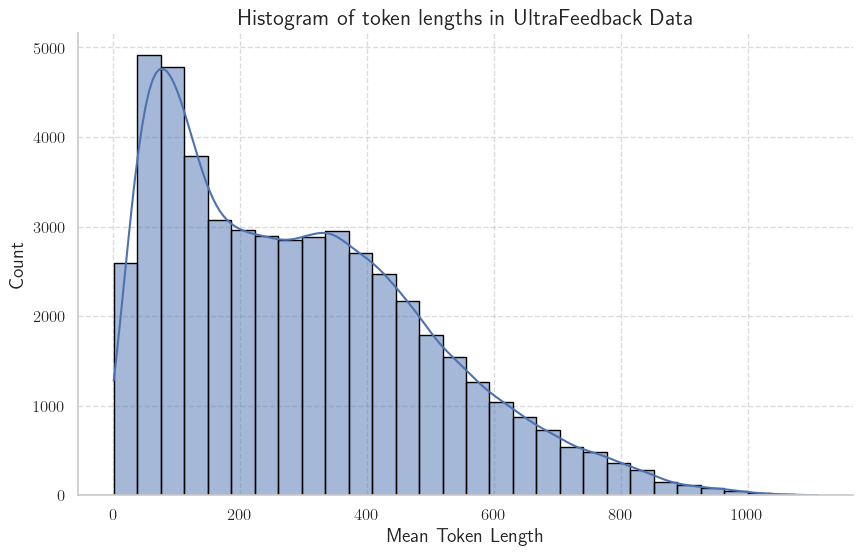

In [14]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
  
# 读取 CSV 文件  
csv_filename = 'lengths.csv'    
df = pd.read_csv(csv_filename)  
  
# 计算每一行的均值  
df['Mean Length'] = df.mean(axis=1)  
  
# 创建一个新的 DataFrame 来存储各列的分位数、最大值和最小值  
stats_df = pd.DataFrame(columns=['Column', '25th Percentile', '50th Percentile', '75th Percentile', 'Min', 'Max'])  
  
# 计算并输出每一列的分位数、最大值和最小值  
for column in df.columns:  
    quantiles = df[column].quantile([0.25, 0.5, 0.75])  
    max_value = df[column].max()  
    min_value = df[column].min()  
      
    print(f"{column} 各分位数：")  
    print(quantiles)  
    print(f"{column} 最大值: {max_value}")  
    print(f"{column} 最小值: {min_value}")  
    print()  # 空行分隔  
  
    # 将统计数据添加到新的 DataFrame 中  
    stats_df = pd.concat([stats_df, pd.DataFrame({  
        'Column': [column],  
        '25th Percentile': [quantiles[0.25]],  
        '50th Percentile': [quantiles[0.5]],  
        '75th Percentile': [quantiles[0.75]],  
        'Min': [min_value],  
        'Max': [max_value]  
    })], ignore_index=True)  
  
# 确保 plot 目录存在  
if not os.path.exists('plot'):  
    os.makedirs('plot')  
  
# 将统计数据写入 CSV 文件  
stats_csv_filename = 'plot/column_statistics_ta.csv'  
stats_df.to_csv(stats_csv_filename, index=False)  
  
# 设置图表的风格  
sns.set(style="whitegrid")  
  
# 创建图表  
plt.figure(figsize=(10, 6))  
  
# 使用 seaborn 绘制直方图  
sns.histplot(df['Mean Length'], bins=30, kde=True, color='b', edgecolor='black')  
  
# 添加标题和标签  
plt.title('Histogram of token lengths in UltraFeedback Data', fontsize=16, weight='bold')  
plt.xlabel('Mean Token Length', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
  
# 设置刻度字体大小  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
# 添加网格  
plt.grid(True, linestyle='--', alpha=0.7)  
  
# 去除顶部和右侧的边框  
sns.despine()  
  
# 保存图表为 PDF 到 plot 目录  
plt.savefig('plot/mean_length_distribution_ta.pdf')  
  
# 显示图表  
plt.show()  


Chosen Length 各分位数：
0.25    128.0
0.50    304.0
0.75    487.0
Name: Chosen Length, dtype: float64
Chosen Length 最大值: 1365
Chosen Length 最小值: 2

Middle Length 各分位数：
0.25     93.0
0.50    260.0
0.75    451.0
Name: Middle Length, dtype: float64
Middle Length 最大值: 1039
Middle Length 最小值: 1

Rejected Length 各分位数：
0.25     77.0
0.50    199.0
0.75    385.0
Name: Rejected Length, dtype: float64
Rejected Length 最大值: 1408
Rejected Length 最小值: 1

Mean Length 各分位数：
0.25    115.333333
0.50    262.666667
0.75    428.666667
Name: Mean Length, dtype: float64
Mean Length 最大值: 1111.3333333333333
Mean Length 最小值: 1.6666666666666667



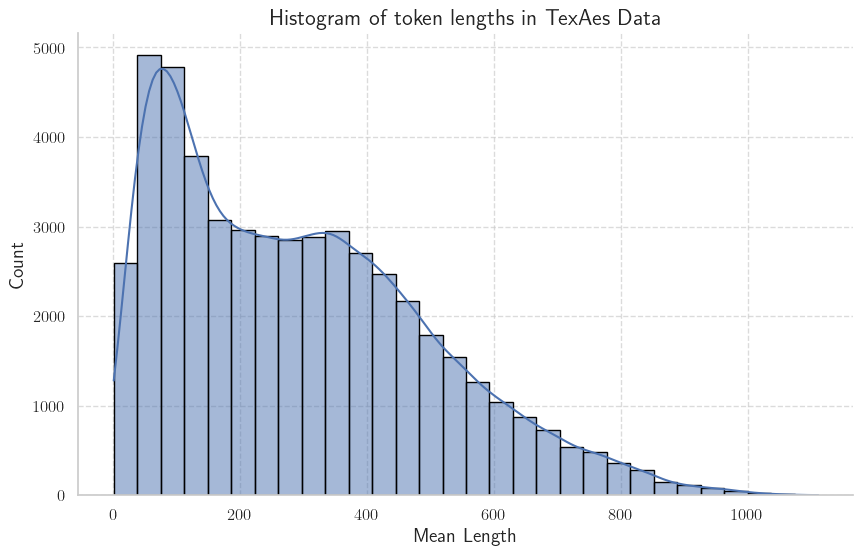

In [12]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
  
# 读取 CSV 文件  
csv_filename = 'lengths.csv'  
df = pd.read_csv(csv_filename)  
  
# 计算每一行的均值  
df['Mean Length'] = df.mean(axis=1)  
  
# 计算并输出每一列的分位数、最大值和最小值  
for column in df.columns:  
    quantiles = df[column].quantile([0.25, 0.5, 0.75])  
    max_value = df[column].max()  
    min_value = df[column].min()  
      
    print(f"{column} 各分位数：")  
    print(quantiles)  
    print(f"{column} 最大值: {max_value}")  
    print(f"{column} 最小值: {min_value}")  
    print()  # 空行分隔  
  
# 设置图表的风格  
sns.set(style="whitegrid")  
  
# 创建图表  
plt.figure(figsize=(10, 6))  
  
# 使用 seaborn 绘制直方图  
sns.histplot(df['Mean Length'], bins=30, kde=True, color='b', edgecolor='black')  
  
# 添加标题和标签  
plt.title('Histogram of token lengths in TexAes Data', fontsize=16, weight='bold')  
plt.xlabel('Mean Length', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
  
# 设置刻度字体大小  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
# 添加网格  
plt.grid(True, linestyle='--', alpha=0.7)  
  
# 去除顶部和右侧的边框  
sns.despine()  
  
# 确保 plot 目录存在  
if not os.path.exists('plot'):  
    os.makedirs('plot')  
  
# 保存图表到 plot 目录  
plt.savefig('plot/mean_length_distribution_ta.png')  
  
# 显示图表  
plt.show()  


Chosen Length 各分位数：
0.25    128.0
0.50    304.0
0.75    487.0
Name: Chosen Length, dtype: float64
Chosen Length 最大值: 1365
Chosen Length 最小值: 2

Middle Length 各分位数：
0.25     93.0
0.50    260.0
0.75    451.0
Name: Middle Length, dtype: float64
Middle Length 最大值: 1039
Middle Length 最小值: 1

Rejected Length 各分位数：
0.25     77.0
0.50    199.0
0.75    385.0
Name: Rejected Length, dtype: float64
Rejected Length 最大值: 1408
Rejected Length 最小值: 1



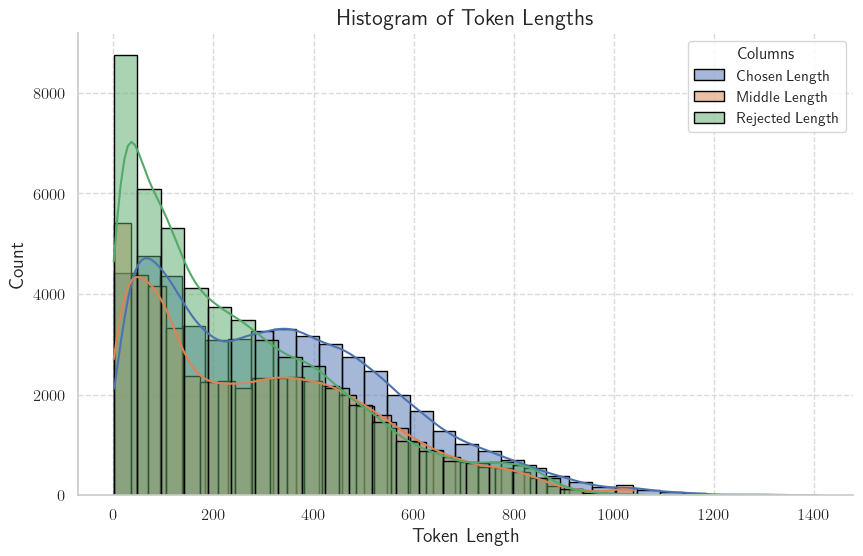

In [16]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
  
# 读取 CSV 文件  
csv_filename = 'lengths.csv'  
df = pd.read_csv(csv_filename)  
  
# 计算并输出每一列的分位数、最大值和最小值  
for column in df.columns:  
    quantiles = df[column].quantile([0.25, 0.5, 0.75])  
    max_value = df[column].max()  
    min_value = df[column].min()  
      
    print(f"{column} 各分位数：")  
    print(quantiles)  
    print(f"{column} 最大值: {max_value}")  
    print(f"{column} 最小值: {min_value}")  
    print()  # 空行分隔  
  
# 设置图表的风格  
sns.set(style="whitegrid")  
  
# 创建图表  
plt.figure(figsize=(10, 6))  
  
# 绘制每一列 token 长度的分布图  
for column in df.columns:  
    sns.histplot(df[column], bins=30, kde=True, label=column, edgecolor='black')  
  
# 添加标题和标签  
plt.title('Histogram of Token Lengths', fontsize=16, weight='bold')  
plt.xlabel('Token Length', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
  
# 设置刻度字体大小  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
# 添加图例  
plt.legend(title='Columns')  
  
# 添加网格  
plt.grid(True, linestyle='--', alpha=0.7)  
  
# 去除顶部和右侧的边框  
sns.despine()  
  
# 确保 plot 目录存在  
if not os.path.exists('plot'):  
    os.makedirs('plot')  
  
# 保存图表到 plot 目录  
plt.savefig('plot/token_length_distribution.png')  
  
# 显示图表  
plt.show()  


所有数据的各分位数：
0.25     97.0
0.50    252.0
0.75    444.0
dtype: float64
所有数据的最大值: 1408
所有数据的最小值: 1



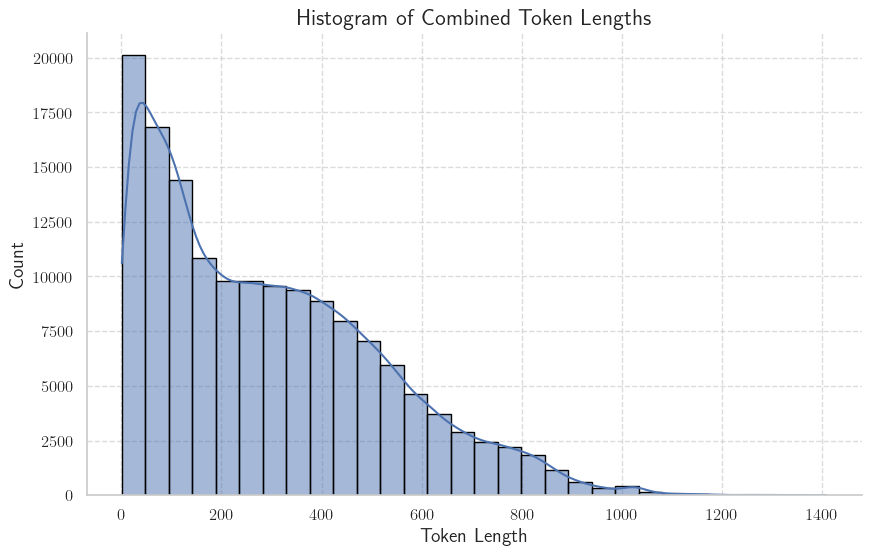

In [17]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
  
# 读取 CSV 文件  
csv_filename = 'lengths.csv'  
df = pd.read_csv(csv_filename)  
  
# 将所有列的数据合并成一个 Series  
all_data = pd.concat([df[column] for column in df.columns])  
  
# 计算并输出所有数据的分位数、最大值和最小值  
quantiles = all_data.quantile([0.25, 0.5, 0.75])  
max_value = all_data.max()  
min_value = all_data.min()  
  
print("所有数据的各分位数：")  
print(quantiles)  
print(f"所有数据的最大值: {max_value}")  
print(f"所有数据的最小值: {min_value}")  
print()  # 空行分隔  
  
# 设置图表的风格  
sns.set(style="whitegrid")  
  
# 创建图表  
plt.figure(figsize=(10, 6))  
  
# 绘制所有数据的 token 长度分布图  
sns.histplot(all_data, bins=30, kde=True, color='b', edgecolor='black')  
  
# 添加标题和标签  
plt.title('Histogram of Combined Token Lengths', fontsize=16, weight='bold')  
plt.xlabel('Token Length', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
  
# 设置刻度字体大小  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
# 添加网格  
plt.grid(True, linestyle='--', alpha=0.7)  
  
# 去除顶部和右侧的边框  
sns.despine()  
  
# 确保 plot 目录存在  
if not os.path.exists('plot'):  
    os.makedirs('plot')  
  
# 保存图表到 plot 目录  
plt.savefig('plot/combined_token_length_distribution.png')  
  
# 显示图表  
plt.show()  


所有数据的各分位数：
0.25     77.0
0.50    255.0
0.75    464.0
dtype: float64
所有数据的最大值: 2700
所有数据的最小值: 1



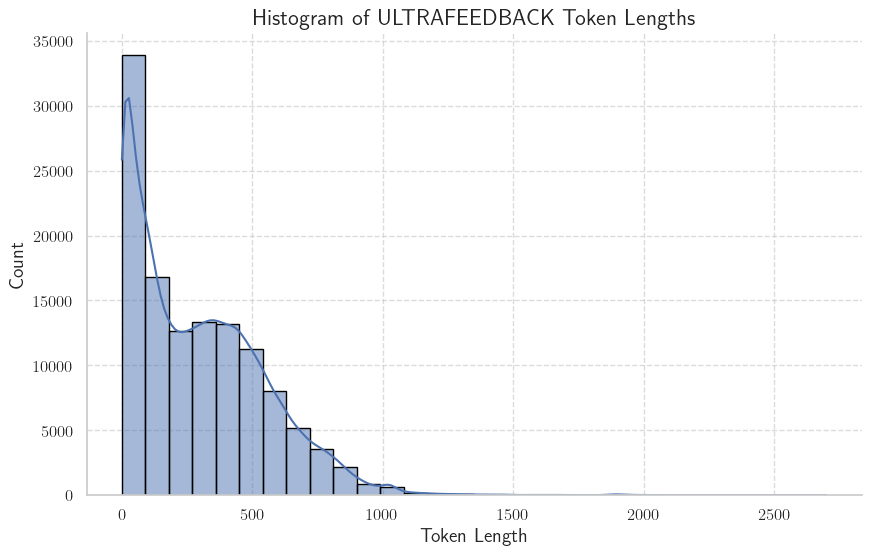

In [19]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
  
# 读取 CSV 文件  
csv_filename = 'lengths_uf.csv'  
df = pd.read_csv(csv_filename)  
  
# 将所有列的数据合并成一个 Series  
all_data = pd.concat([df[column] for column in df.columns])  
  
# 计算并输出所有数据的分位数、最大值和最小值  
quantiles = all_data.quantile([0.25, 0.5, 0.75])  
max_value = all_data.max()  
min_value = all_data.min()  
  
print("所有数据的各分位数：")  
print(quantiles)  
print(f"所有数据的最大值: {max_value}")  
print(f"所有数据的最小值: {min_value}")  
print()  # 空行分隔  
  
# 设置图表的风格  
sns.set(style="whitegrid")  
  
# 创建图表  
plt.figure(figsize=(10, 6))  
  
# 绘制所有数据的 token 长度分布图  
sns.histplot(all_data, bins=30, kde=True, color='b', edgecolor='black')  
  
# 添加标题和标签  
plt.title('Histogram of ULTRAFEEDBACK Token Lengths', fontsize=16, weight='bold')  
plt.xlabel('Token Length', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
  
# 设置刻度字体大小  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
# 添加网格  
plt.grid(True, linestyle='--', alpha=0.7)  
  
# 去除顶部和右侧的边框  
sns.despine()  
  
# 确保 plot 目录存在  
if not os.path.exists('plot'):  
    os.makedirs('plot')  
  
# 保存图表到 plot 目录  
plt.savefig('plot/combined_token_length_distribution_uf.png')  
  
# 显示图表  
plt.show()  


Chosen Length 各分位数：
0.25     94.0
0.50    288.0
0.75    489.0
Name: Chosen Length, dtype: float64
Chosen Length 最大值: 2700
Chosen Length 最小值: 1

Rejected Length 各分位数：
0.25     65.0
0.50    220.0
0.75    435.0
Name: Rejected Length, dtype: float64
Rejected Length 最大值: 1068
Rejected Length 最小值: 1

Mean Length 各分位数：
0.25     91.0
0.50    257.5
0.75    455.5
Name: Mean Length, dtype: float64
Mean Length 最大值: 1530.5
Mean Length 最小值: 1.0



/tmp/ipykernel_649015/1986784053.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, pd.DataFrame({


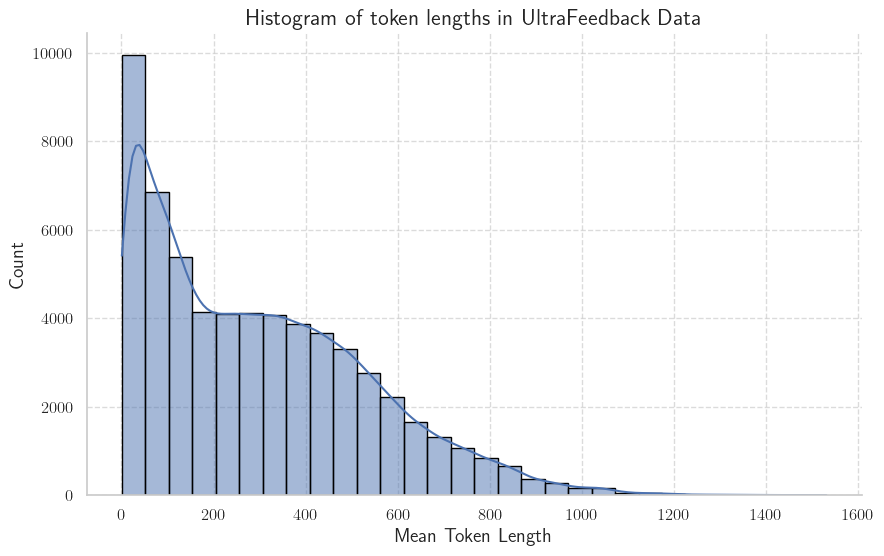

In [10]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
  
# 读取 CSV 文件  
csv_filename = 'lengths_uf.csv'  
df = pd.read_csv(csv_filename)  
  
# 计算每一行的均值  
df['Mean Length'] = df.mean(axis=1)  
  
# 创建一个新的 DataFrame 来存储各列的分位数、最大值和最小值  
stats_df = pd.DataFrame(columns=['Column', '25th Percentile', '50th Percentile', '75th Percentile', 'Min', 'Max'])  
  
# 计算并输出每一列的分位数、最大值和最小值  
for column in df.columns:  
    quantiles = df[column].quantile([0.25, 0.5, 0.75])  
    max_value = df[column].max()  
    min_value = df[column].min()  
      
    print(f"{column} 各分位数：")  
    print(quantiles)  
    print(f"{column} 最大值: {max_value}")  
    print(f"{column} 最小值: {min_value}")  
    print()  # 空行分隔  
  
    # 将统计数据添加到新的 DataFrame 中  
    stats_df = pd.concat([stats_df, pd.DataFrame({  
        'Column': [column],  
        '25th Percentile': [quantiles[0.25]],  
        '50th Percentile': [quantiles[0.5]],  
        '75th Percentile': [quantiles[0.75]],  
        'Min': [min_value],  
        'Max': [max_value]  
    })], ignore_index=True)  
  
# 确保 plot 目录存在  
if not os.path.exists('plot'):  
    os.makedirs('plot')  
  
# 将统计数据写入 CSV 文件  
stats_csv_filename = 'plot/column_statistics_uf.csv'  
stats_df.to_csv(stats_csv_filename, index=False)  
  
# 设置图表的风格  
sns.set(style="whitegrid")  
  
# 创建图表  
plt.figure(figsize=(10, 6))  
  
# 使用 seaborn 绘制直方图  
sns.histplot(df['Mean Length'], bins=30, kde=True, color='b', edgecolor='black')  
  
# 添加标题和标签  
plt.title('Histogram of token lengths in UltraFeedback Data', fontsize=16, weight='bold')  
plt.xlabel('Mean Token Length', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
  
# 设置刻度字体大小  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
# 添加网格  
plt.grid(True, linestyle='--', alpha=0.7)  
  
# 去除顶部和右侧的边框  
sns.despine()  
  
# 保存图表为 PDF 到 plot 目录  
plt.savefig('plot/mean_length_distribution_uf.pdf')  
  
# 显示图表  
plt.show()  
